<p><strong><span style="font-size: 18px;">Introduction:</span></strong><span style="font-size: 18px;">&nbsp;In this project, we will be strengthening our visualization skills by using different matplotlib and seaborn graphical instrument function. </span></p>

<p><span style="font-size: 18px;"><strong>Methodology:</strong></span></p>
<ol>
    <li><span style="font-size: 18px;">Process the data for better structure and understanding</span></li>
    <li><span style="font-size: 18px;">Illustrate graphs and other plot on different ambits&nbsp;</span></li>
</ol>

<p><span style="font-size: 18px;"><strong>Content</strong></span></p>
<ul>
    <li><span style="font-size: 16px;"><strong>Part 1:</strong> Foot and Goal Scored&nbsp;</span></li>
    <li><span style="font-size: 16px;"><strong>Part 2:</strong> Shot Placement&nbsp;</span></li>
    <li><span style="font-size: 16px;"><strong>Part 3: </strong>Play&apos;s Situation&nbsp;</span></li>
    <li><span style="font-size: 16px;"><strong>Part 4:</strong> Match Event Duration&nbsp;</span></li>
    <li><span style="font-size: 16px;"><strong>Part 5:</strong> Home/Away Win&nbsp;</span></li>
</ul>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
events = pd.read_csv('events.csv')
ginf = pd.read_csv('ginf.csv')

In [5]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [6]:
ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [7]:
events.groupby("id_odsp")["is_goal"].sum()

id_odsp
004f4ING/    1
00LMl81F/    5
00OX4xFp/    0
00QH2XdM/    5
00QL4t1L/    2
            ..
zyEQMq2D/    2
zyJsFDYG/    2
zyKwAQxf/    1
zyrHmI8P/    4
zyzdxP10/    5
Name: is_goal, Length: 9074, dtype: int64

In [8]:
event_types_r = {1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'}
event_types2_r = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}
sides_r = {1:'Home', 2:'Away'}
shot_places_r = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
shot_outcomes_r = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
locations_r = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}
bodyparts_r = {1:'right foot', 2:'left foot', 3:'head'}
assist_methods_r = {0:np.nan, 1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situations_r = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}

In [10]:
events["event_type"] = events["event_type"].replace(event_types_r)
events["event_type2"] = events["event_type2"].replace(event_types2_r)
events["side"] = events["side"].replace(sides_r)
events["shot_place"] = events["shot_place"].replace(shot_places_r)
events["shot_outcome"] = events["shot_outcome"].replace(shot_outcomes_r)
events["location"] = events["location"].replace(locations_r)
events["bodypart"] = events["bodypart"].replace(bodyparts_r)
events["assist_method"]= events["assist_method"].replace(assist_methods_r)
events["situation"] = events["situation"].replace(situations_r)

<p>As you can see, the data is divided on a event level where each event is recorded for many different match. For each event, there is a corresponding description highlighting the details of that particular event. As you can see there are different metric which describe the event such as:</p>
<ul>
    <li><strong>shot_place</strong>: if event is a shot, then the shot place on the goalpost</li>
    <li><strong>shot_outcome</strong>: if event is a shot, then the outcome of the shot</li>
    <li><strong>is_goal</strong>: whether that event is a goal or not</li>
    <li><strong>location</strong>: location from the ball is shot</li>
    <li><strong>bodypart</strong>: bodypart used to shoot/pass</li>
    <li><strong>assist_method</strong>: type of assist performed</li>
    <li><strong>situation</strong>: situation of the play conducted</li>
</ul>
<p><br></p>

In [11]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Key Pass,Away,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,NaN,Home,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,NaN,Away,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,Defensive half,NaN,NaN,NaN,0


<p><strong><span style="font-size: 20px;">Part 1:</span></strong><span style="font-size: 20px;">&nbsp;Foot and Goal Scored</span></p>

In [12]:
pie_1 = events[['bodypart', 'id_event']].groupby('bodypart').count().reset_index().rename(columns={'id_event': 'count'})
pie_1.head()

,bodypart,count
0,head,35956
1,left foot,71290
2,right foot,121939


In [13]:
goals = events[events['is_goal']==1]

In [14]:
pie_2 = goals[['bodypart', 'id_event']].groupby('bodypart').count().reset_index().rename(columns={'id_event': 'count'})

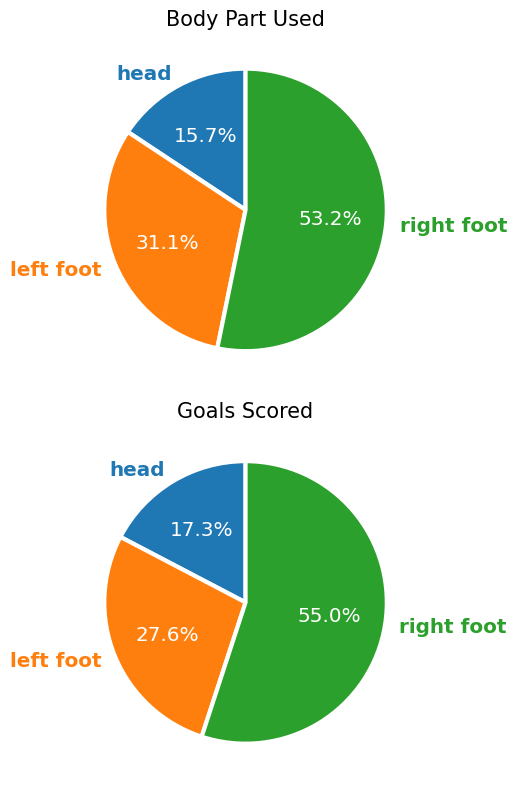

In [194]:
x = pie_1["count"]
# Make figure and axes
fig, axs = plt.subplots(2,figsize=(8, 8))

# A standard pie plot
patches, texts, pcts = axs[0].pie( x, labels=pie_1['bodypart'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
axs[0].set_title('Body Part Used', fontsize=15)
plt.tight_layout()

x = pie_2["count"]
# Shift the second slice using explode
patches, texts, pcts = axs[1].pie(x, labels=pie_2['bodypart'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

# Make percent texts even smaller
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
axs[1].set_title('Goals Scored', fontsize=15)
plt.tight_layout()

<p><strong><span style="font-size: 18px;">Insights:</span></strong></p>
<ol>
    <li style="font-size: 18px;">Right-footed shots have been attempted and scored goal the most too. Followed by left foot and then head.</li>
    <li style="font-size: 18px;">In terms of goal conversion, head has taken a lead and then right foot goal conversion comes second.</li>
</ol>

<p><strong><span style="font-size: 20px;">Part 2:</span></strong><span style="font-size: 20px;">&nbsp;Shot Placement</span></p>

<p><span style="font-size: 18px;">In this analysis, we will find the pattern of the shot placement against goal conversion.</span></p>

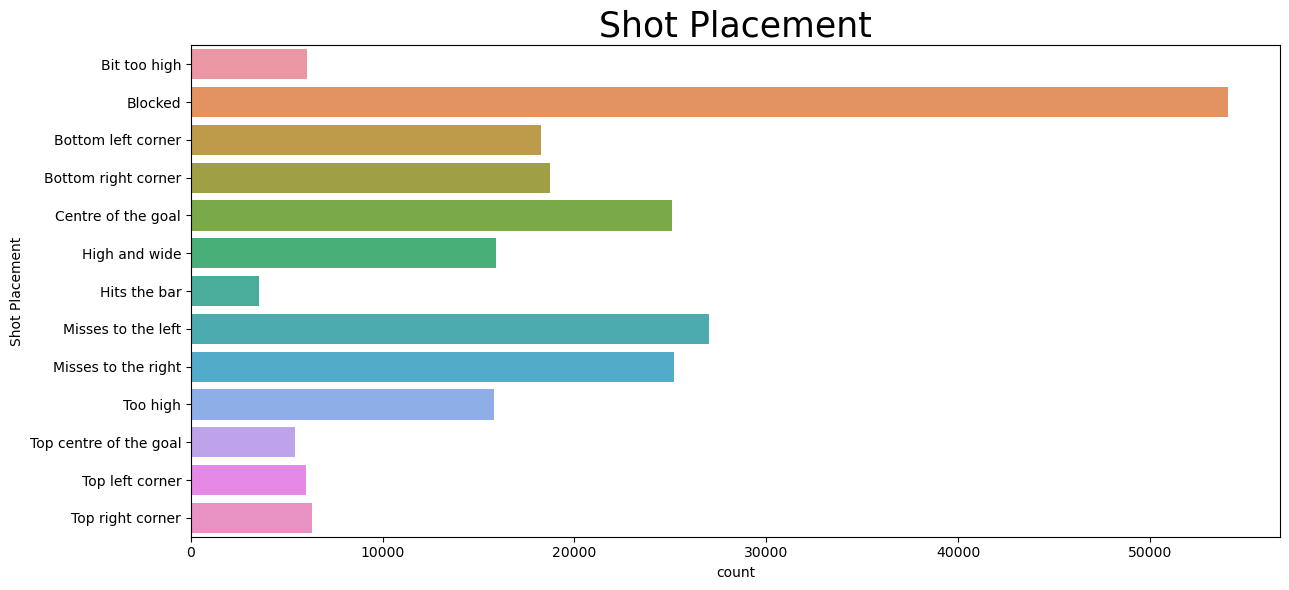

In [16]:
fig, ax = plt.subplots(figsize=[13,6])
shot_placement = events[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
shot_placement.head()
ax = sns.barplot(x=shot_placement['count'], y=shot_placement['shot_place'])
ax.set_ylabel(ylabel='Shot Placement')
plt.title("Shot Placement", fontsize=25)
plt.tight_layout()
plt.show()

In [17]:
shot_events = events.loc[events["shot_outcome"]=="On target"]
Shot_Place = shot_events[['shot_place', 'id_event']].groupby(['shot_place'], as_index=False).count().rename(columns={'id_event': 'attempts'})

In [18]:
shot_goals = events.loc[(events['shot_outcome'] == "On target") & (events["is_goal"]==1)]
shot_goals = shot_goals[['shot_place', 'id_event']].groupby(['shot_place'], as_index=False).count().rename(columns={'id_event': 'goals'})

In [19]:
Shot_Place.head()

,shot_place,attempts
0,Bottom left corner,18260
1,Bottom right corner,18748
2,Centre of the goal,25079
3,Top centre of the goal,5402
4,Top left corner,4645


In [20]:
shot_goals.head()

,shot_place,goals
0,Bottom left corner,7212
1,Bottom right corner,6932
2,Centre of the goal,4446
3,Top left corner,2023
4,Top right corner,2157


In [21]:
combined = pd.merge(shot_goals,Shot_Place,on='shot_place',how='inner')
combined['goal_conversion'] = combined['goals']/combined['attempts']
combined.head()

,shot_place,goals,attempts,goal_conversion
0,Bottom left corner,7212,18260,0.394962
1,Bottom right corner,6932,18748,0.369746
2,Centre of the goal,4446,25079,0.177280
3,Top left corner,2023,4645,0.435522
4,Top right corner,2157,4834,0.446214


<AxesSubplot:xlabel='shot_place', ylabel='goals'>

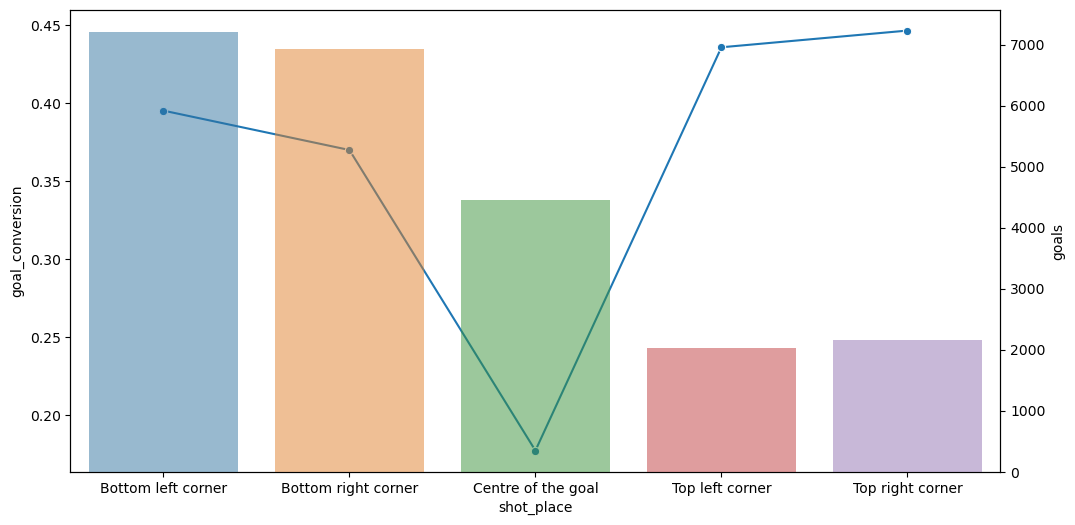

In [22]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = combined, x='shot_place',y='goal_conversion',  marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = combined, x='shot_place',y='goals', alpha=0.5, ax=ax2)

<p><strong><span style="font-size: 18px;">Insights:</span></strong></p>
<p><span style="font-size: 18px;">For all kinds of shots,</span></p>
<ol>
    <li style="font-size: 18px;">Top left and Top Right tend to have high goal conversion (~0.44) but much shot placement towards it is significantly lower than other shot placement area</li>
    <li style="font-size: 18px;">Bottom left and Bottom Right tend to have high goal conversion too (~0.38) with a decent proportion of attempts too</li>
    <li style="font-size: 18px;">The Center of the goal has the lowest attempt and lowest goal conversion too.</li>
</ol>

<AxesSubplot:xlabel='shot_place', ylabel='attempts'>

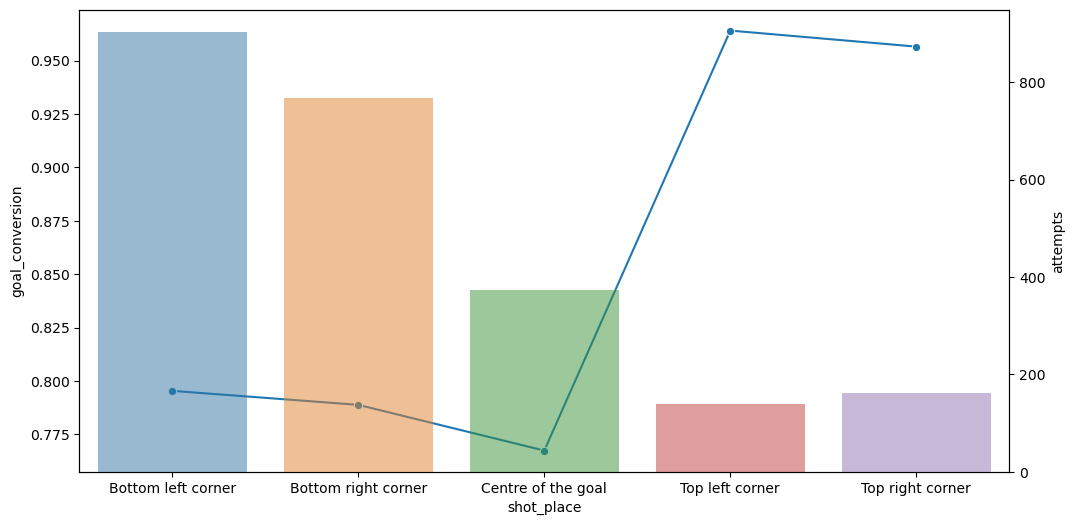

In [23]:
penalties_events = events[events["location"]=="Penalty spot"]
penalties_events_final = penalties_events[['shot_place', 'id_event']].groupby(['shot_place'], as_index=False).count().rename(columns={'id_event': 'attempts'})
penalties_goals_final = penalties_events[penalties_events["is_goal"]==1][['shot_place', 'id_event']].groupby(['shot_place'], as_index=False).count().rename(columns={'id_event': 'goals'})
penalties_combined = pd.merge(penalties_events_final,penalties_goals_final,on='shot_place',how='inner')
penalties_combined['goal_conversion'] = penalties_combined['goals']/penalties_combined['attempts']
penalties_events_final.head()


fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = penalties_combined, x='shot_place',y='goal_conversion',  marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = penalties_combined, x='shot_place',y='attempts', alpha=0.5, ax=ax2)

<p><strong><span style="font-size: 18px;">Insights:</span></strong></p>
<p><span style="font-size: 18px;">For penalties, a similar trend can be observed such as:&nbsp;</span></p>
<ol>
    <li style="font-size: 18px;">Top left and Top Right tend to have high goal conversion (~0.955) but shot placement is the lowest compared to others.</li>
    <li style="font-size: 18px;">However, goal conversion significantly drop for the bottom left &amp; bottom right shots (~0.78) but with the highest number of attempts made</li>
    <li style="font-size: 18px;">The Center of the goal has the lowest goal conversion but 3rd highest number of attempts.</li>
</ol>

In [24]:
body_part_new = shot_events[['bodypart','shot_place','id_event']].groupby(['bodypart','shot_place']).count().reset_index()

In [25]:
body_part_new.head()

,bodypart,shot_place,id_event
0,head,Bottom left corner,2335
1,head,Bottom right corner,2397
2,head,Centre of the goal,3515
3,head,Top centre of the goal,1547
4,head,Top left corner,1110


In [26]:
body_part_new['Partition_Sum'] = body_part_new.groupby(['bodypart']).id_event.transform(np.sum)

In [27]:
body_part_new['Partition_Ratio'] = body_part_new['id_event'] / body_part_new['Partition_Sum']
body_part_new.head()

,bodypart,shot_place,id_event,Partition_Sum,Partition_Ratio
0,head,Bottom left corner,2335,11906,0.196120
1,head,Bottom right corner,2397,11906,0.201327
2,head,Centre of the goal,3515,11906,0.295229
3,head,Top centre of the goal,1547,11906,0.129934
4,head,Top left corner,1110,11906,0.093230


<p><span style="font-size: 18px;">In this analysis, we are using the line plot to check the relationship between the foot used to make an attempt against the area of the goal post-targetted. Meaning that maybe people with left foot are more likely to target the right side and so forth.</span></p>

<AxesSubplot:xlabel='shot_place', ylabel='Partition_Ratio'>

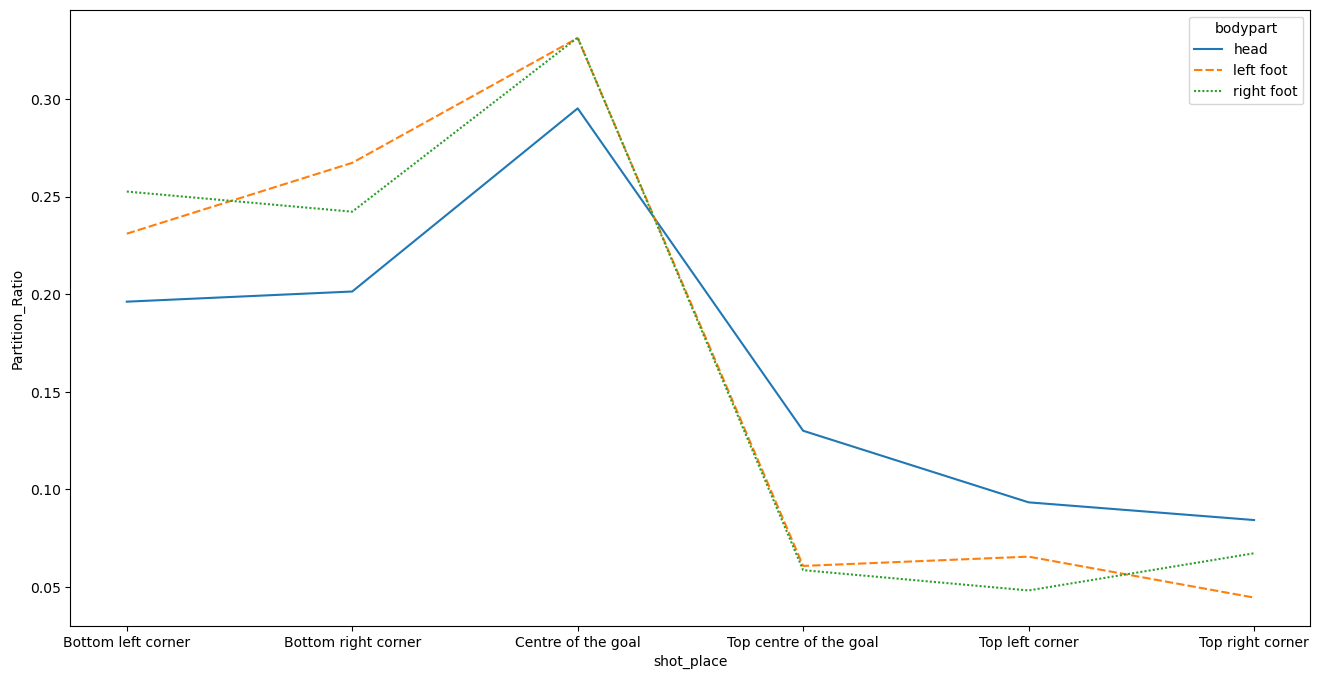

In [29]:
fig, axes = plt.subplots(1, 1,figsize=(16, 8))

#create boxplot in each subplot
# sns.lineplot(x='shot_place',y='Partition_Ratio',data=xyz[xyz["bodypart"]=="head"])
# sns.lineplot(x='shot_place',y='Partition_Ratio',data=xyz[xyz["bodypart"]=="left foot"])
# sns.lineplot(x='shot_place',y='Partition_Ratio',data=xyz[xyz["bodypart"]=="right foot"])

sns.lineplot(x="shot_place", y="Partition_Ratio",
             hue="bodypart", style="bodypart",
             data=body_part_new)

<p><span style="font-size: 18px;"><strong>Insights</strong></span></p>
<p><span style="font-size: 18px;">We noticed that&nbsp;</span></p>
<ol>
    <li style="font-size: 18px;">Right-footed shooters slightly prefer shooting at Bottom Right Corner or Top Right Corner.</li>
    <li style="font-size: 18px;">Left-footed shooters slightly prefer shooting at Bottom Left Corner or Top Left Corner.</li>
</ol>

<p><strong><span style="font-size: 20px;">Part 3:</span></strong><span style="font-size: 20px;">&nbsp;Play's Situation</span></p>

<AxesSubplot:xlabel='situation', ylabel='attempts'>

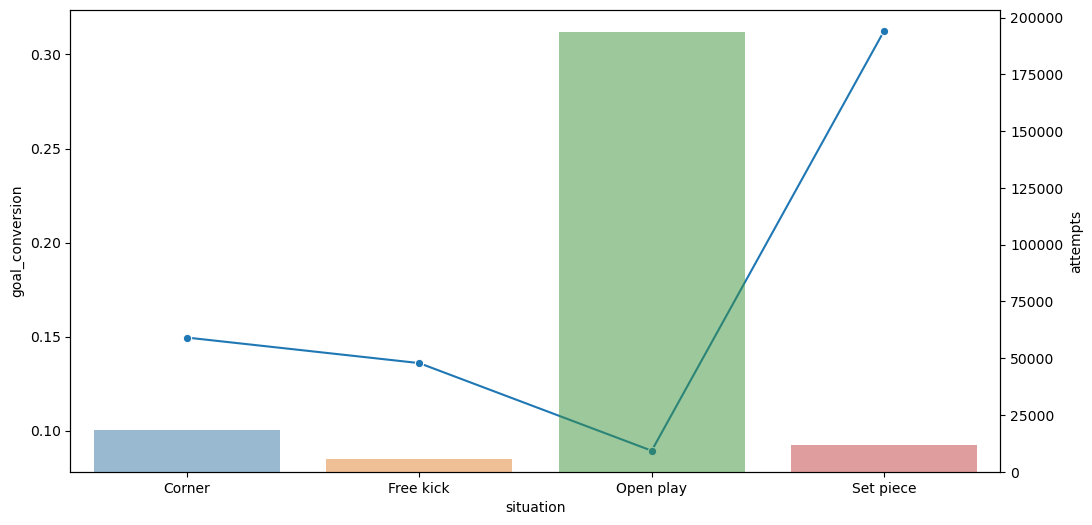

In [30]:
Situation_Place = events[['situation', 'id_event']].groupby(['situation'], as_index=False).count().rename(columns={'id_event': 'attempts'})
Situation_goals = events[events["is_goal"]==1][['situation', 'id_event']].groupby(['situation'], as_index=False).count().rename(columns={'id_event': 'goals'})
Situation_combined = pd.merge(Situation_Place,Situation_goals,on='situation',how='inner')
Situation_combined['goal_conversion'] = Situation_combined['goals']/Situation_combined['attempts']

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = Situation_combined, x='situation',y='goal_conversion',  marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = Situation_combined, x='situation',y='attempts', alpha=0.5, ax=ax2)

<p><span style="font-size: 18px;">Further analyzing the open plays</span></p>

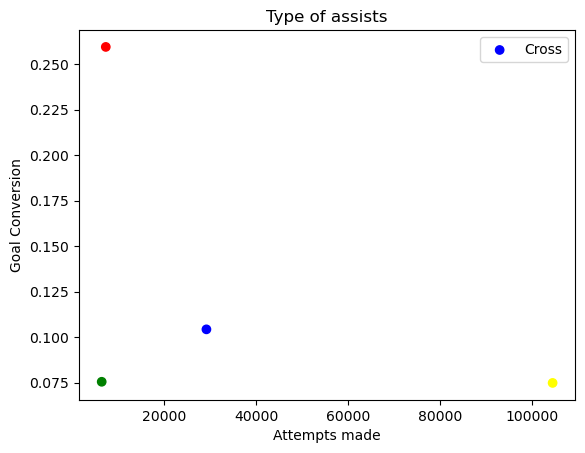

In [31]:
assist_event = events.loc[(events['situation'] == "Open play")]
assist_event = assist_event[['assist_method', 'id_event']].groupby('assist_method').count().rename(columns={'id_event': 'attempts'})

assist_goal = goals.loc[(events['situation'] == "Open play")]
assist_goal = assist_goal[['assist_method', 'id_event']].groupby('assist_method').count().rename(columns={'id_event': 'goals'})
assist_combined = pd.merge(assist_event,assist_goal,on='assist_method',how='inner')
assist_combined["assist_met"] = assist_combined["goals"]/assist_combined["attempts"]
colors = ['blue','green','yellow','red']
assist_combined.head()
labelss=["Cross" , "Headed pass","Pass","Through ball"]
fig, ax = plt.subplots()

ax.scatter(assist_combined['attempts'], assist_combined['assist_met'],  c=colors)
plt.xlabel('Attempts made') 
plt.ylabel('Goal Conversion') 
  
# displaying the title
plt.title("Type of assists")
plt.legend(labels=labelss)
plt.show()

<p><span style="font-size: 18px;">Here as you can see, we have used a scatter plot to determine the scatter between the assist made during an open play against the goal conversion of that attempt.</span></p>

<p><strong><span style="font-size: 20px;">Part 4:</span></strong><span style="font-size: 20px;">&nbsp;Match Event Duration</span></p>

Text(0.5, 1.0, 'Goals Distribution')

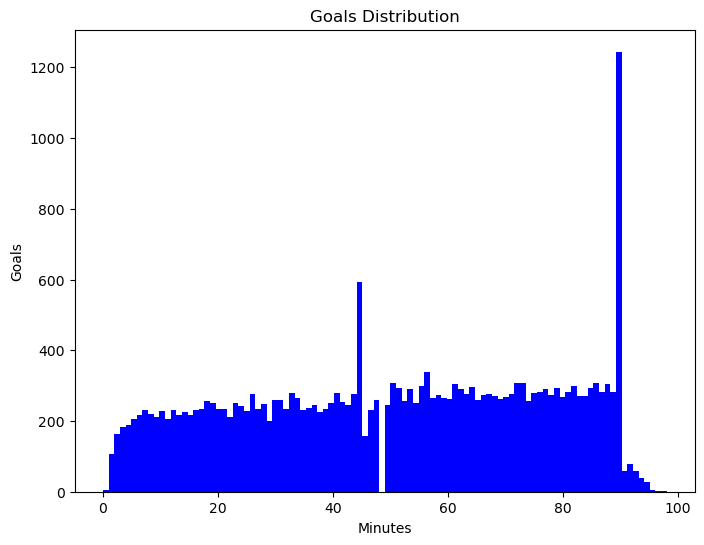

In [32]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals.time,width=1,bins=100,color="blue")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Goals")
plt.title("Goals Distribution")

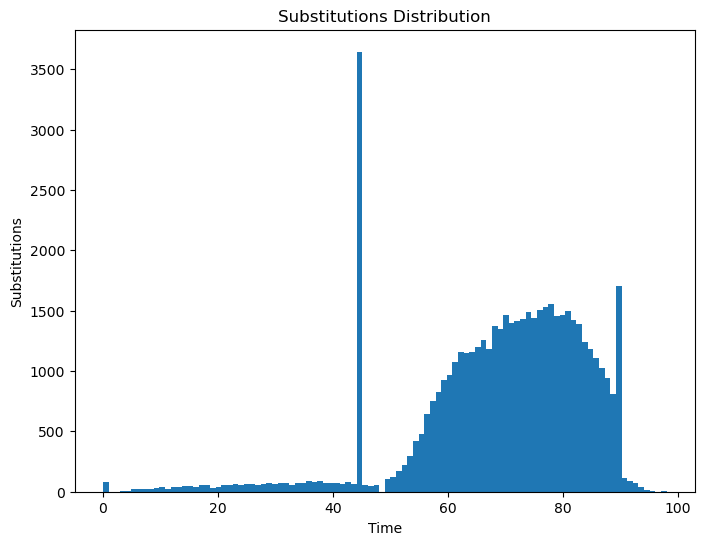

In [33]:
fig=plt.figure(figsize=(8,6))
plt.hist(events[events['event_type'] == 'Substitution'].time, 100)
plt.xlabel("Time")
plt.ylabel("Substitutions")
plt.title("Substitutions Distribution")
plt.show()

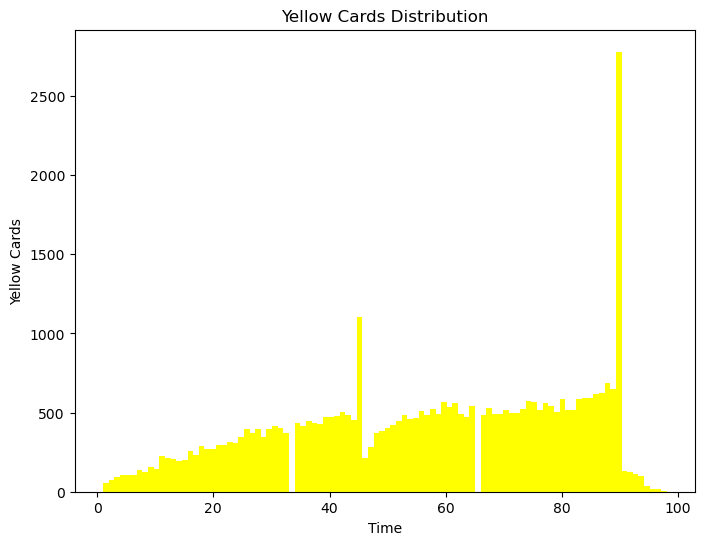

In [34]:
fig=plt.figure(figsize=(8,6))
plt.hist(events[events['event_type'] == 'Yellow card'].time, bins = 100,color="yellow")
plt.xlabel("Time")
plt.ylabel("Yellow Cards")
plt.title("Yellow Cards Distribution")
plt.show()

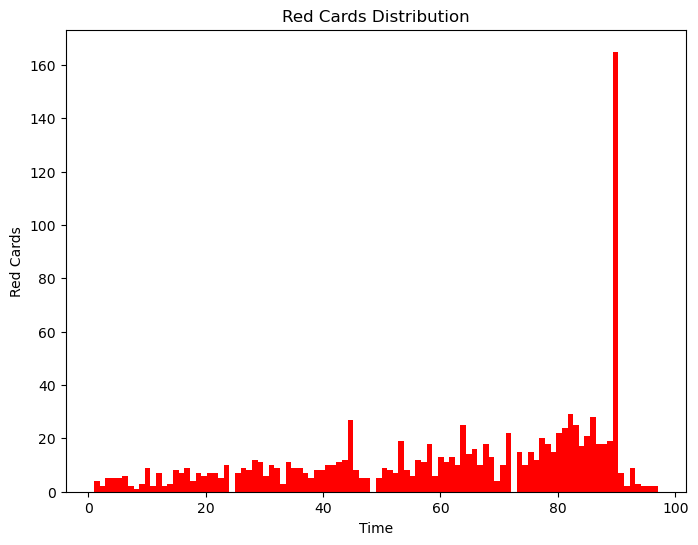

In [35]:
fig=plt.figure(figsize=(8,6))
plt.hist(events[events['event_type'] == 'Red card'].time, bins = 100,color="red")
plt.xlabel("Time")
plt.ylabel("Red Cards")
plt.title("Red Cards Distribution")
plt.show()

<p><span style="font-size: 18px;"><strong>Insights</strong></span></p>
<p><span style="font-size: 18px;">From these 3 distributions, we have noticed these insights&nbsp;</span></p>
<ol>
    <li style="font-size: 18px;">Firstly, most events happen in the second half compared to the first half.</li>
    <li style="font-size: 18px;">The highest ratio of events happen on the 90th minute of the game.</li>
</ol>

<p><strong><span style="font-size: 20px;">Part 5:</span></strong><span style="font-size: 20px;">&nbsp;Home/Away Win</span></p>

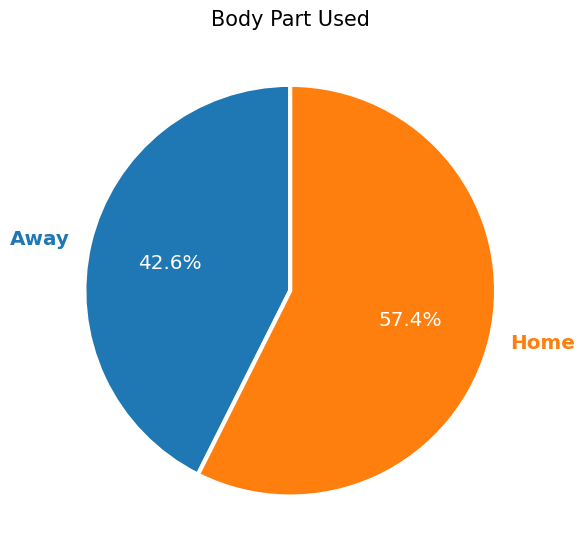

In [195]:
side_goal = goals[['side', 'is_goal']].groupby('side').sum().reset_index().rename(columns={'is_goal': 'count'})
# Make figure and axes
fig, axs = plt.subplots(figsize=(6,6))

# A standard pie plot
patches, texts, pcts = axs.pie(side_goal['count'], labels=side_goal['side'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
axs.set_title('Body Part Used', fontsize=15)
plt.tight_layout()

In [127]:
home_goal = ginf[['ht', 'fthg']].groupby('ht').mean().rename(columns={'fthg': 'avg_home_goal'})
home_goal = pd.merge(home_goal,ginf[['ht','country']],on='ht',how='left')
home_goal.drop_duplicates(subset="ht", keep="first", inplace=True)
home_goal.shape

(147, 3)

In [128]:
away_goal = ginf[['at', 'ftag']].groupby('at').mean().reset_index().rename(columns={'ftag': 'avg_away_goal','at':'ht'})
combined = pd.merge(home_goal,away_goal,on='ht',how='inner')
combined.head()

,ht,avg_home_goal,country,avg_away_goal
0,AC Ajaccio,1.122807,france,0.912281
1,AC Milan,1.622642,italy,1.557692
2,AJ Auxerre,1.578947,france,0.842105
3,AS Monaco,1.808824,france,1.671642
4,AS Nancy Lorraine,1.104167,france,0.812500


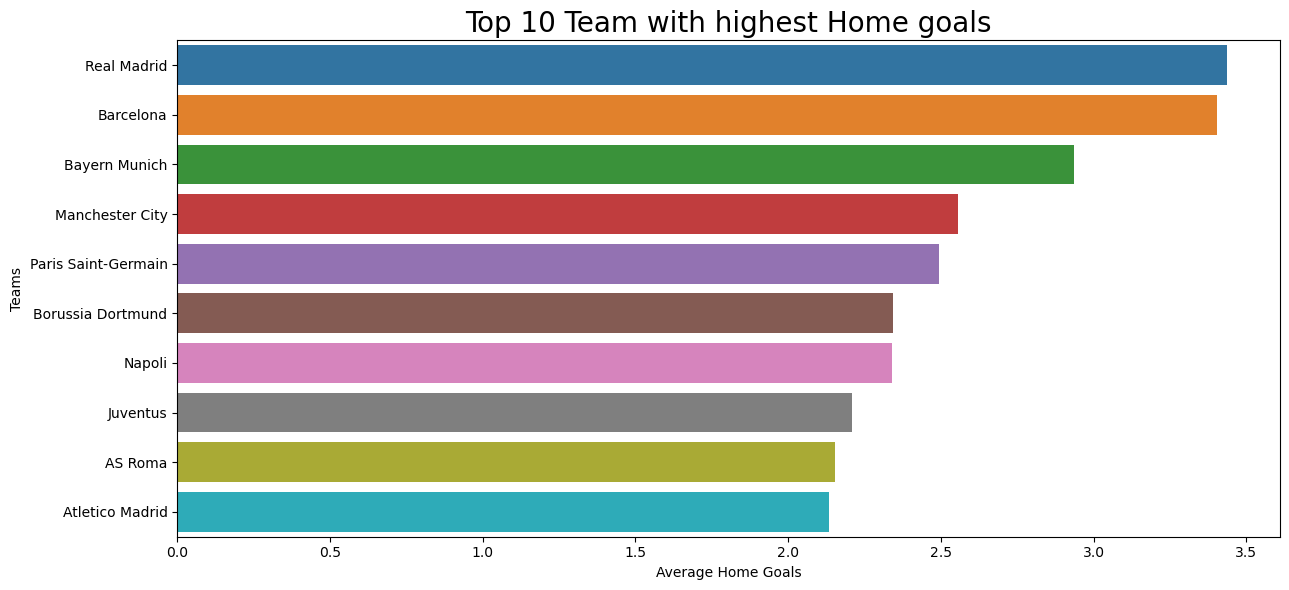

In [129]:
top_home_goals = combined.sort_values("avg_home_goal",ascending=False).reset_index()
fig, ax = plt.subplots(figsize=[13,6])
ax = sns.barplot(x=top_home_goals['avg_home_goal'], y=top_home_goals['ht'].head(10))
ax.set_ylabel(ylabel='Teams')
ax.set_xlabel(xlabel='Average Home Goals')
plt.title("Top 10 Team with highest Home goals", fontsize=20)
plt.tight_layout()
plt.show()

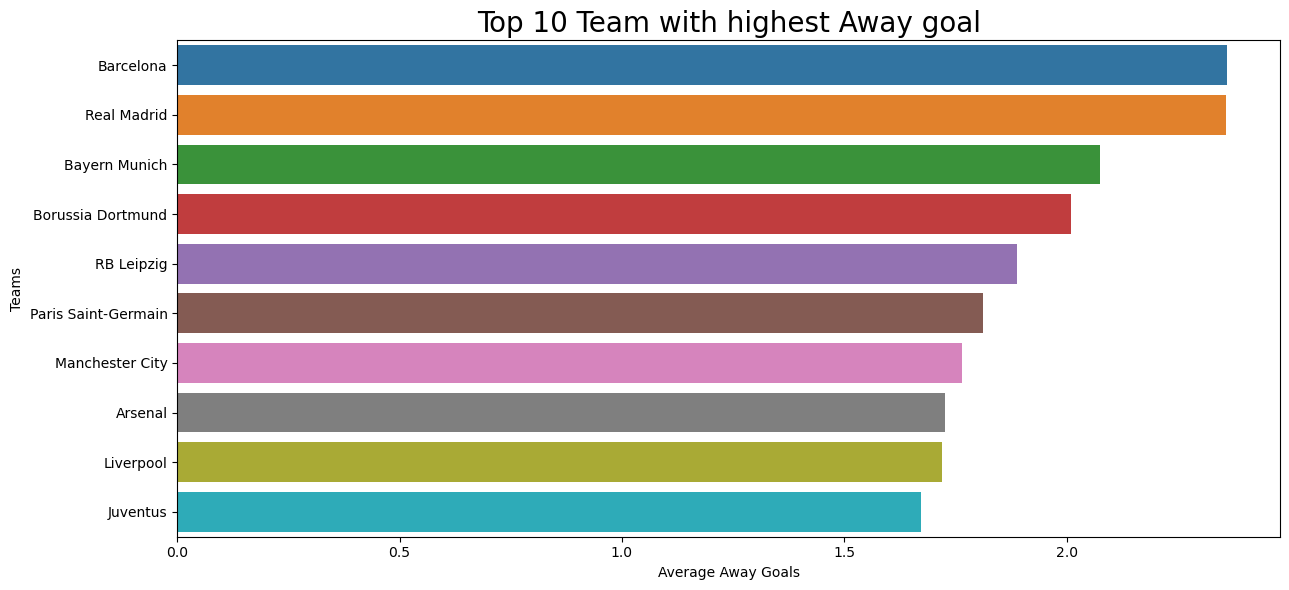

In [130]:
top_away_goals = combined.sort_values("avg_away_goal",ascending=False).reset_index()
fig, ax = plt.subplots(figsize=[13,6])
ax = sns.barplot(x=top_away_goals['avg_away_goal'], y=top_away_goals['ht'].head(10))
ax.set_ylabel(ylabel='Teams')
ax.set_xlabel(xlabel='Average Away Goals')
plt.title("Top 10 Team with highest Away goal", fontsize=20)
plt.tight_layout()
plt.show()

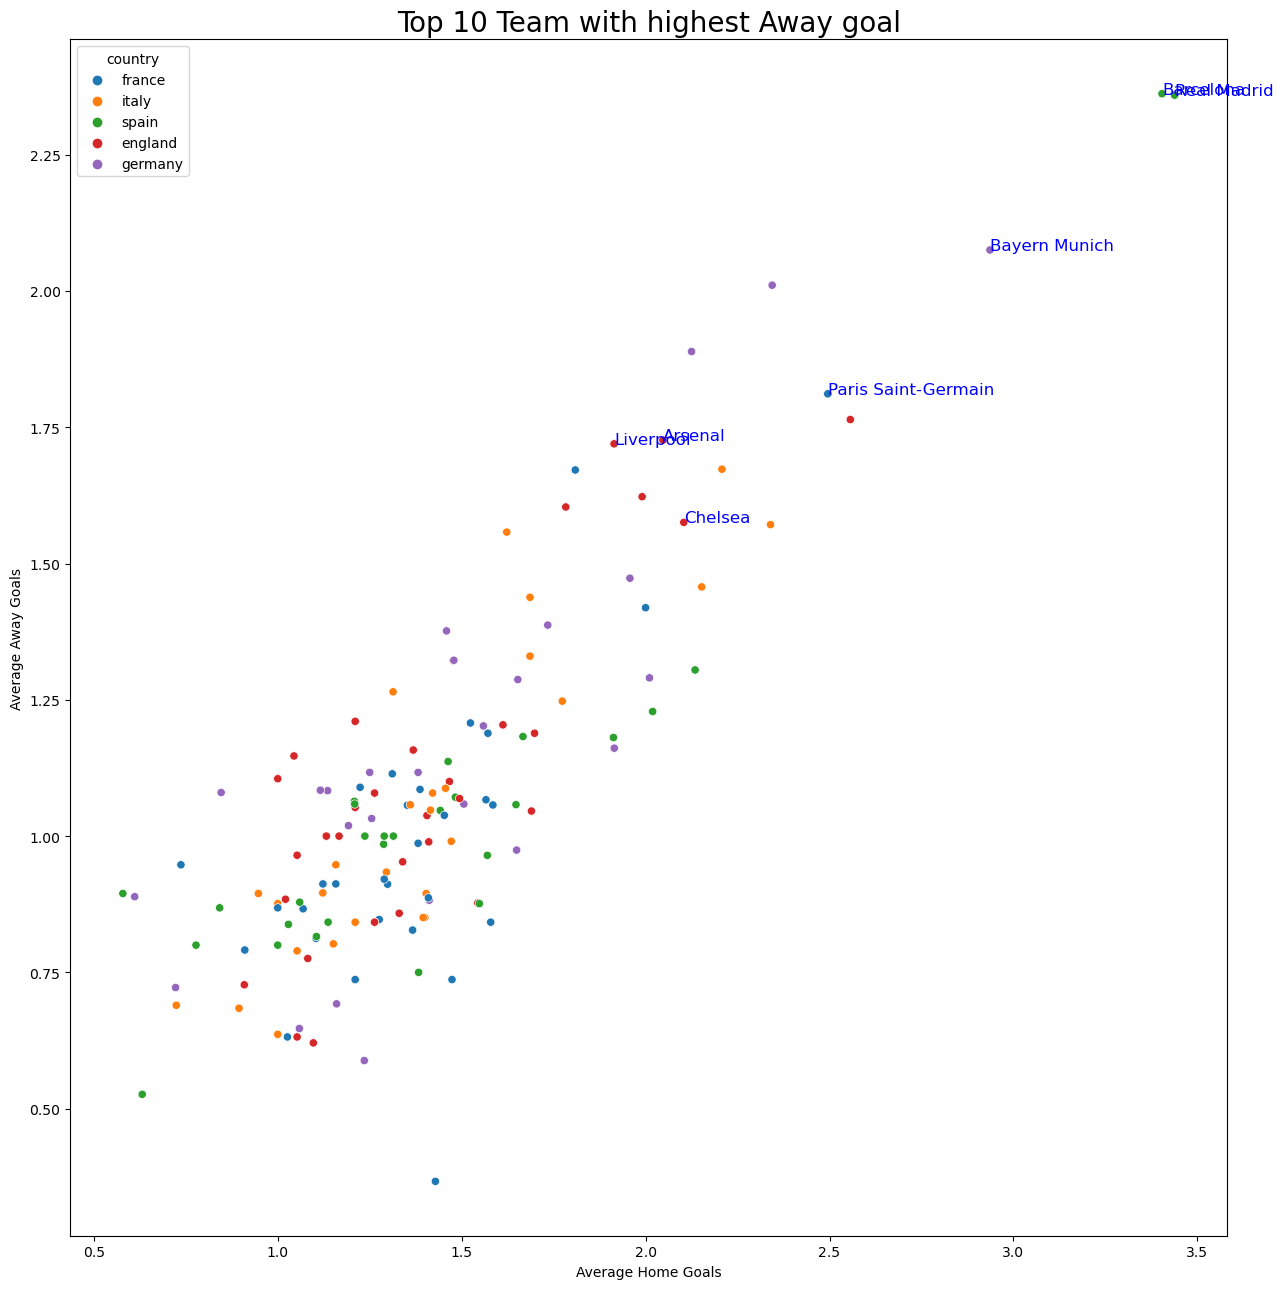

In [131]:
fig, ax = plt.subplots(figsize=[13,13])
country = combined.loc[combined['ht'].isin(['Real Madrid','Barcelona','Bayern Munich','Manchester United','Liverpool','Chelsea','Arsenal','Paris Saint-Germain'])]
sns.scatterplot(x='avg_home_goal', y='avg_away_goal', data=combined, hue='country')
ax.set_ylabel(ylabel='Average Away Goals')
ax.set_xlabel(xlabel='Average Home Goals')
[plt.text(x=combined['avg_home_goal'], y=combined['avg_away_goal'], s=combined['ht'],color='blue',size=12) for k,combined in country.iterrows()]
plt.title("Top 10 Team with highest Away goal", fontsize=20)
plt.tight_layout()
plt.show()

<p>So, as you can see from these visuals, there is a strong correlation between average home and average away goals for most teams. Furthermore, the same team who have most goals on home ground tend to have most away goals too,</p>

<p><strong><span style="font-size: 20px;">Part 6:</span></strong><span style="font-size: 20px;">&nbsp;Total Win & Loss
</span></p>

In [132]:
ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,winner
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,Borussia Dortmund
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,Tie
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,Werder Bremen
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,Lorient
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,Caen


In [134]:
ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,winner
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,Borussia Dortmund
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,Tie
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,Werder Bremen
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,Lorient
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,Caen


In [137]:
ginf['winner'] = np.where(ginf['fthg'] > ginf['ftag'], ginf['ht'], None)
ginf['winner'] = np.where(ginf['fthg'] < ginf['ftag'], ginf['at'], None)
ginf['winner'] = np.where(ginf['fthg'] == ginf['ftag'], "Tie", None)

ginf['winner'] = np.where(ginf['fthg'] > ginf['ftag'], ginf['ht'], np.where(ginf['fthg'] < ginf['ftag'], ginf['at'], np.where(ginf['fthg'] == ginf['ftag'], "Tie", None)))

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,winner
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,Borussia Dortmund
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,Tie
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,Werder Bremen
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,Lorient
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,Caen
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN,Nurnberg
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN,Tie
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN,Toulouse
8,UBZQ4smg/,/soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...,True,2011-08-06,F1,2012,france,Nice,Lyon,1,3,4.50,3.55,2.00,NaN,NaN,NaN,NaN,Lyon
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN,VfL Wolfsburg


With this, we were able to add another column named "winner" to highlight the winner for that particular match.

In [138]:
winner_count = ginf[['winner', 'id_odsp']].groupby('winner').count().reset_index().rename(columns={'id_odsp': 'match_won'})
home_count = ginf[['ht', 'id_odsp']].groupby('ht').count().reset_index().rename(columns={'id_odsp': 'home_matches_played'})
away_count = ginf[['at', 'id_odsp']].groupby('at').count().reset_index().rename(columns={'id_odsp': 'away_matches_played'})



In [139]:
home_count.head()

,ht,home_matches_played
0,AC Ajaccio,57
1,AC Milan,106
2,AJ Auxerre,19
3,AS Monaco,68
4,AS Nancy Lorraine,48


In [140]:
goal_combined = pd.merge(home_count,away_count,left_on='ht', right_on='at',how='outer')
goal_combined = goal_combined.drop(['at'],axis=1).rename(columns={'ht': 'Team'})
goal_combined['Total_Matches_Played'] = goal_combined['home_matches_played'] + goal_combined['away_matches_played']

In [141]:
combined_1.head()

,level_0,index,Team,away_matches_played,Total_Matches_Played,match_won,Win_Percentage
146,146,36,Cordoba,19.0,38.0,3.0,0.078947
145,145,37,Crotone,11.0,20.0,2.0,0.100000
144,144,134,US Pescara,29.0,58.0,6.0,0.103448
143,143,33,Cesena,38.0,76.0,8.0,0.105263
142,142,102,Racing Santander,19.0,38.0,4.0,0.105263


In [154]:
goal_combined_1 = pd.merge(goal_combined,winner_count,left_on='Team', right_on='winner',how='outer')
goal_combined_1 = goal_combined_1.drop(['winner','home_matches_played'],axis=1)
goal_combined_1['Win_Percentage'] =  goal_combined_1['match_won'] / goal_combined_1['Total_Matches_Played']
goal_combined_1.head()

,Team,away_matches_played,Total_Matches_Played,match_won,Win_Percentage
0,AC Ajaccio,57.0,114.0,22.0,0.192982
1,AC Milan,104.0,210.0,100.0,0.476190
2,AJ Auxerre,19.0,38.0,7.0,0.184211
3,AS Monaco,67.0,135.0,75.0,0.555556
4,AS Nancy Lorraine,48.0,96.0,26.0,0.270833


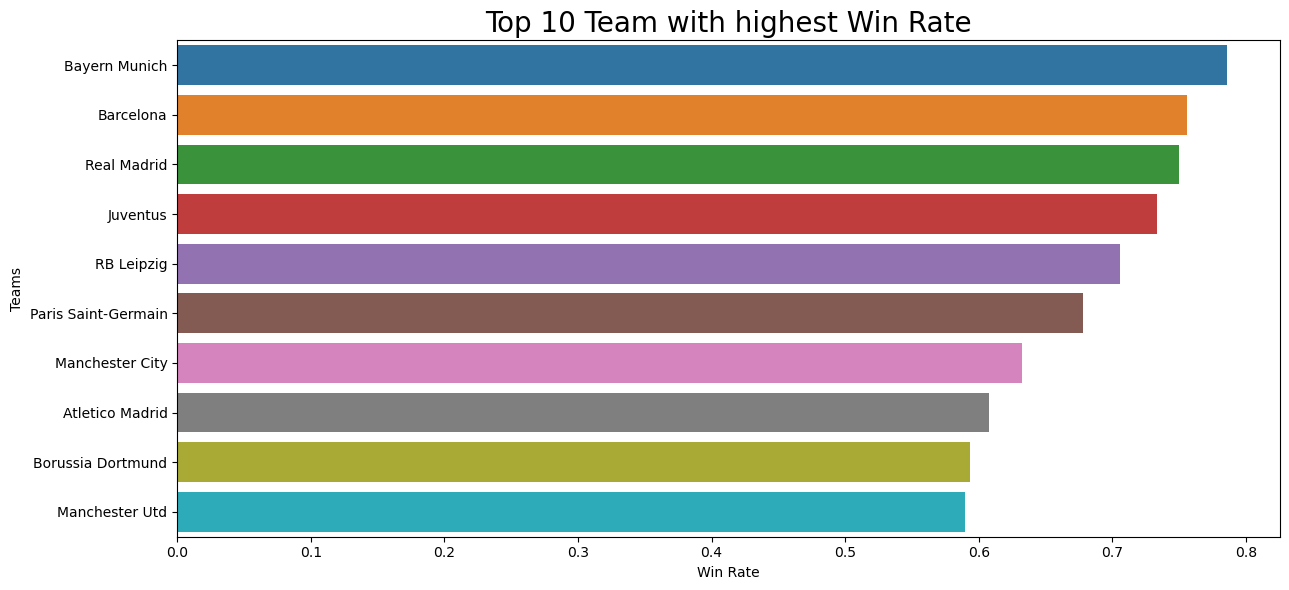

In [155]:
goal_combined_1 = goal_combined_1.sort_values("Win_Percentage",ascending=False).reset_index(drop=True)
fig, ax = plt.subplots(figsize=[13,6])
ax = sns.barplot(x=goal_combined_1['Win_Percentage'], y=goal_combined_1['Team'].head(10))
ax.set_ylabel(ylabel='Teams')
ax.set_xlabel(xlabel='Win Rate')
plt.title("Top 10 Team with highest Win Rate", fontsize=20)
plt.tight_layout()
plt.show()

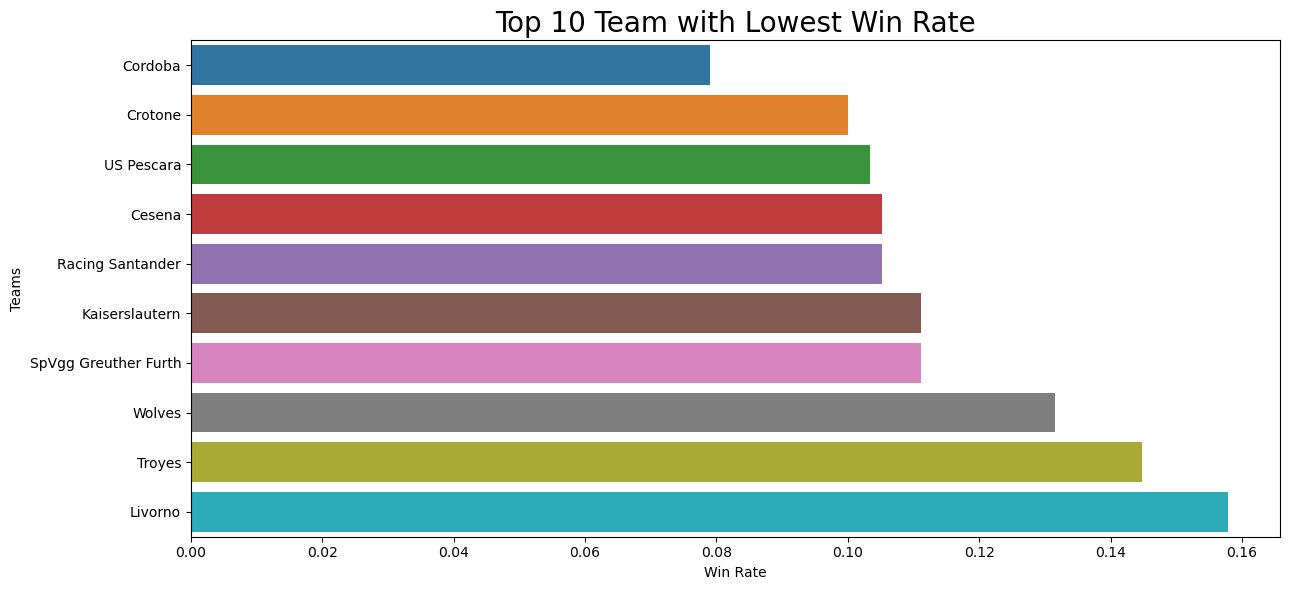

In [156]:
goal_combined_1 = goal_combined_1.sort_values("Win_Percentage",ascending=True).reset_index(drop=True)
fig, ax = plt.subplots(figsize=[13,6])
ax = sns.barplot(x=goal_combined_1['Win_Percentage'], y=goal_combined_1['Team'].head(10))
ax.set_ylabel(ylabel='Teams')
ax.set_xlabel(xlabel='Win Rate')
plt.title("Top 10 Team with Lowest Win Rate", fontsize=20)
plt.tight_layout()
plt.show()

In [157]:
combined.head()

,ht,avg_home_goal,country,avg_away_goal
0,AC Ajaccio,1.122807,france,0.912281
1,AC Milan,1.622642,italy,1.557692
2,AJ Auxerre,1.578947,france,0.842105
3,AS Monaco,1.808824,france,1.671642
4,AS Nancy Lorraine,1.104167,france,0.812500


In [158]:
goal_combined_1.head()

,Team,away_matches_played,Total_Matches_Played,match_won,Win_Percentage
0,Cordoba,19.0,38.0,3.0,0.078947
1,Crotone,11.0,20.0,2.0,0.100000
2,US Pescara,29.0,58.0,6.0,0.103448
3,Cesena,38.0,76.0,8.0,0.105263
4,Racing Santander,19.0,38.0,4.0,0.105263


In [189]:
total = pd.merge(combined,goal_combined_1,left_on='ht',right_on='Team',how='outer')
total = total.dropna(subset=['Win_Percentage'])
total.isnull().sum()

ht                      0
avg_home_goal           0
country                 0
avg_away_goal           0
Team                    0
away_matches_played     0
Total_Matches_Played    0
match_won               0
Win_Percentage          0
dtype: int64

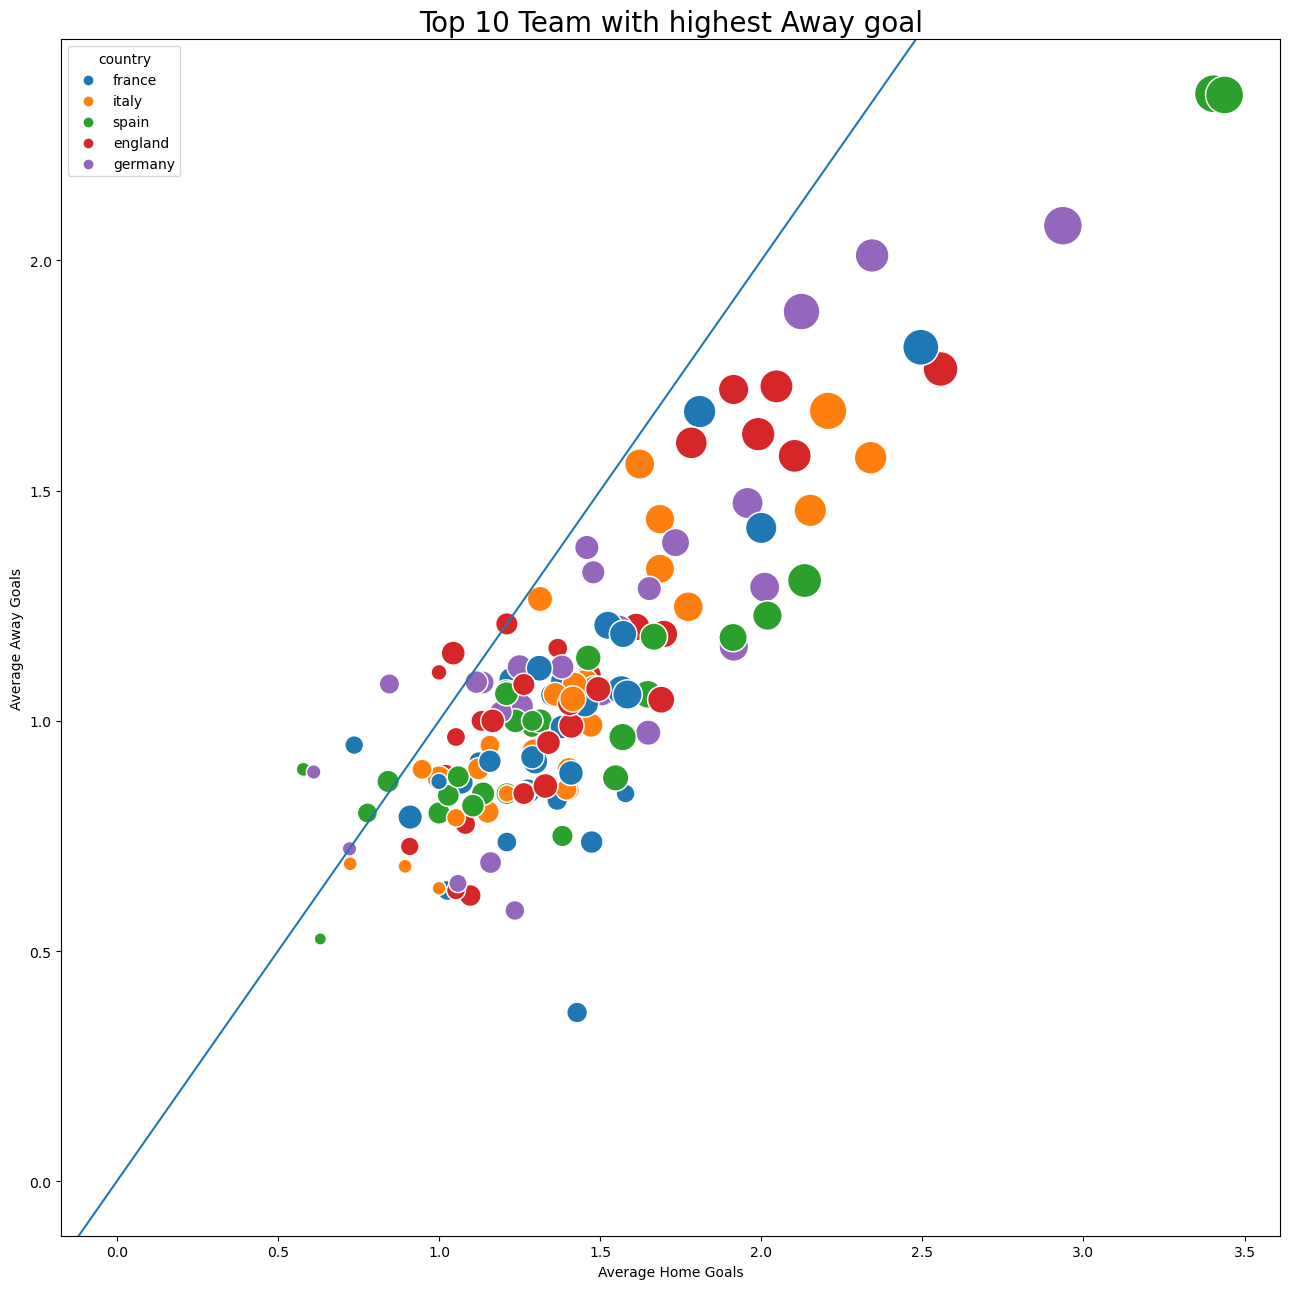

In [192]:
fig, ax = plt.subplots(figsize=[13,13])
sns.scatterplot(x='avg_home_goal', y='avg_away_goal', data=total, hue='country',s=1000*total[['Win_Percentage']])
ax.axline((0, 0), slope=1)
ax.set_ylabel(ylabel='Average Away Goals')
ax.set_xlabel(xlabel='Average Home Goals')
# [plt.text(x=total['avg_home_goal'], y=total['avg_away_goal'], s=total['ht'],color='blue',size=12) for k,combined in country.iterrows()]
plt.title("Top 10 Team with highest Away goal", fontsize=20)
plt.tight_layout()
plt.show()

This is a simple graph which drafts the relationship between the average home goals and average away goals. As you can see, the more you increase the average home & away goals, the bigger the bubble size becomes which represent goals; This highlights a strong coorelation between the goals and wins (because goals win matches :D)

In [169]:
total.head()

,ht,avg_home_goal,country,avg_away_goal,Team,away_matches_played,Total_Matches_Played,match_won,Win_Percentage
9,Arsenal,2.047170,england,1.726415,Arsenal,106.0,212.0,122.0,0.575472
14,Barcelona,3.403846,spain,2.361905,Barcelona,105.0,209.0,158.0,0.755981
17,Bayern Munich,2.936170,germany,2.075269,Bayern Munich,93.0,187.0,147.0,0.786096
34,Chelsea,2.103774,england,1.575472,Chelsea,106.0,212.0,121.0,0.570755
76,Liverpool,1.914286,england,1.719626,Liverpool,107.0,212.0,103.0,0.485849


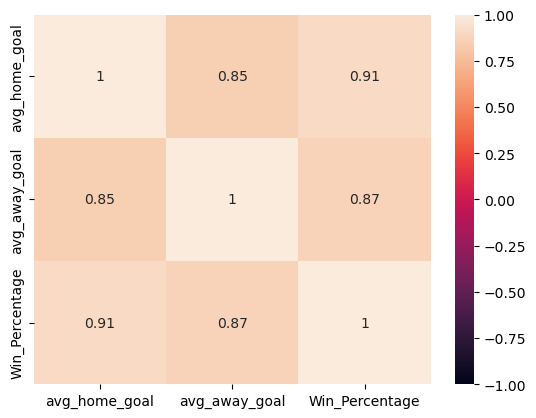

In [193]:
heatmap = sns.heatmap(total[['avg_home_goal','avg_away_goal','Win_Percentage']].corr(), vmin=-1, vmax=1, annot=True)

This further solidifies the relationship between goals and match wins where there is a coorelation of around 0.9 of match wins against goals. (The closer it is to 1, the stronger the coorelation)